<a href="https://colab.research.google.com/github/filizolalab/CADD2021/blob/main/BSR3101_Tutorial_Working_with_molecules_in_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Molecules, molecular properties, fingerprints



*This tutorial is part of the BSR3101 Computer Aided Drug Design, and is based on [DeepChem tutorials](https://github.com/deepchem/deepchem/tree/master/examples/tutorials). Also check the [DeepChem website](https://deepchem.io/) for other tutorials and documentation.*

We will use [`deepchem`](https://deepchem.io/) and [`rdKit`](https://www.rdkit.org/) within the [Google Colaboratory](https://colab.research.google.com/) framework. Google Colaboratory is a cloud-based platform to run python code without the need to setup your local machine with a python environment. It allows you to write and execute Python in your browser, with zero configuration required, Free access to GPUs, Easy sharing. The code you develop and run in colab will run in any python environment. [`deepchem`](https://deepchem.io/) is a pyhton library that implements tools to create high quality, open source tools for drug discovery, materials science, quantum chemistry, and biology. [`rdKit`](https://www.rdkit.org/) is a library of chemoinformatics 

## Install and import `rdkit` and `deepchem`

To run this tutorial the machine where the calculations are executed must have a copy of the `rdkit` libarary installed. If you're running this on a machine where this is not the case, the library can be installed with the following `pip` command You can of course run this tutorial *locally* if you prefer. In 
this case, don't run the `pip install` cell since it will download and install Anaconda on your local machine. 

In [ ]:
!pip install --pre rdkit-pypi 
!pip install --pre deepchem
#!pip install --pre PubChemPy

     |████████████████████████████████| 20.6 MB 4.5 MB/s 
     |████████████████████████████████| 609 kB 30.5 MB/s 


Installing the library is not enough... the library (or parts of it) have to be "imported" into the program so that its functions and objects can be accessed. The following commands load the required `rdkit` functions so they are available for use in this notebook. 

We also load the `pandas` library and the `numpy` library. These provide common functions for math and tables.

In [ ]:
## import some rdkit functions
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

## import pandas and numpy for tables and maths
import pandas as pd
import numpy as np

## 1. Create `rdkit` molecule objects and display them


### Create a molecule object from a SMILES string

Using `rdkit` it's sraightforward to convert a SMILES string to an image of the corresponding molecule

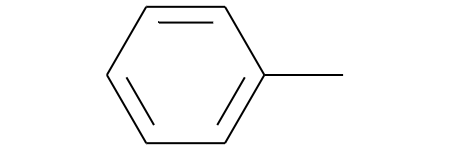

In [ ]:
smiles = 'Cc1ccccc1'
molecule = Chem.MolFromSmiles(smiles)
molecule


We can use the same functions to create a list of molecule objects from a list of SMILES strings


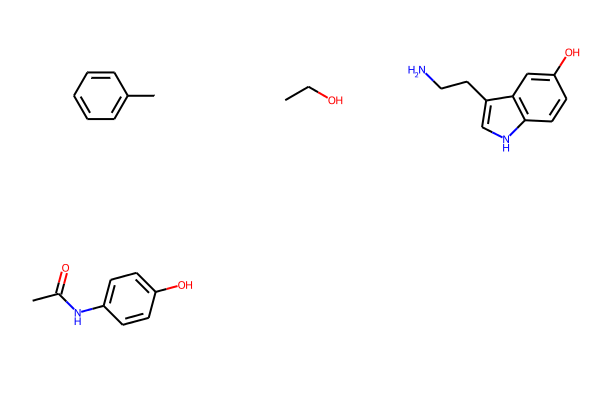

In [ ]:
smiles_list = ['Cc1ccccc1',
               'CCO',
               'C1=CC2=C(C=C1O)C(=CN2)CCN',
               'CC(=O)NC1=CC=C(C=C1)O']
molecule_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
Draw.MolsToGridImage(molecule_list)

## 2. Calculate molecular properties with `rdkit`

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

In [ ]:
from rdkit.Chem import rdMolDescriptors, Crippen

pd.DataFrame(
    {'smiles': smiles_list,
     'RB': [rdMolDescriptors.CalcNumRotatableBonds(molecule) for molecule in molecule_list],
     'HBD': [rdMolDescriptors.CalcNumHBD(molecule) for molecule in molecule_list],
     'HBA': [rdMolDescriptors.CalcNumHBA(molecule) for molecule in molecule_list],
     'MW': [rdMolDescriptors.CalcExactMolWt(molecule) for molecule in molecule_list],
     'logP': [Crippen.MolLogP(mol) for mol in molecule_list]})



,smiles,RB,HBD,HBA,MW,logP
0,Cc1ccccc1,0,0,0,92.062600,1.99502
1,CCO,0,1,1,46.041865,-0.00140
2,C1=CC2=C(C=C1O)C(=CN2)CCN,2,3,2,176.094963,1.37470
3,CC(=O)NC1=CC=C(C=C1)O,1,2,2,151.063329,1.35060


In [ ]:
from rdkit.Chem import rdMolDescriptors as rdMD, Descriptors

props = rdMD.Properties()
names = list(props.GetAvailableProperties())
results = [props.ComputeProperties(mol) for mol in molecule_list]
pd.DataFrame(results, columns = names)

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,92.062600,92.141,0.0,0.0,0.0,0.0,0.0,7.0,15.0,0.0,0.0,0.142857,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.796345,0.00,1.99502,31.1790,4.386751,2.410684,0.940456,0.940456,0.534378,4.386751,2.410684,0.940456,0.940456,0.534378,-0.78,4.380772,1.783286,1.038264,1.116024
1,46.041865,46.069,1.0,1.0,0.0,1.0,1.0,3.0,9.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.898427,20.23,-0.00140,12.7598,2.154320,1.023335,0.000000,0.000000,0.000000,2.154320,1.023335,0.000000,0.000000,0.000000,-0.04,2.960000,1.960000,1.960000,1.933867
2,176.094963,176.219,3.0,4.0,2.0,3.0,2.0,13.0,25.0,3.0,0.0,0.200000,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.186237,62.04,1.37470,52.7219,7.248179,4.300793,2.164682,2.164682,1.528734,7.248179,4.300793,2.164682,2.164682,1.528734,-1.48,8.133459,3.106143,1.380449,1.943361
3,151.063329,151.165,3.0,2.0,1.0,2.0,2.0,11.0,20.0,3.0,1.0,0.125000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.666905,49.33,1.35060,42.4105,6.164863,3.249098,1.187673,1.187673,0.748027,6.164863,3.249098,1.187673,1.187673,0.748027,-1.51,7.595374,3.053138,2.292304,2.108157


## 3. Calculating fingerprints in `rdkit`

`rdkit` makes it easy to calculate several types of fingerprints starting from the `molecule` objects generated from the SMILES strings.


In [ ]:
## import the `rdkit` functions needed for this task
from rdkit.Chem import AllChem
from rdkit import DataStructs

## calculated the linear fingerprints for all the molecules in the `molecule_list`
fps = [AllChem.GetMorganFingerprintAsBitVect(mol,4,1024) for mol in molecule_list]


In [ ]:
fps_mol0 = fps[0]
list(fps_mol0.GetOnBits())


[31, 33, 64, 175, 356, 389, 698, 726, 799, 821, 849, 896, 923]

In [ ]:
fps[0]

In [ ]:
DataStructs.BulkTanimotoSimilarity(fps[0],fps)

[1.0, 0.05555555555555555, 0.07692307692307693, 0.12121212121212122]

## 4. Clustering based on fingerprint similarity

In [ ]:
from rdkit.ML.Cluster import Butina


## 5. Simple linear QSAR model

## Working with `deepchem` datasets

`deepchem` provides easy access to several databases of molecules through `molnet`. 